# **CO2 Emissions Prediction (Linear regression) :**


In this project, we're going to predict CO2 emissions using a machine learning model called linear regression.

First, we'll look at the data to learn more about it. We'll find out what makes sense in the data and get it ready for our prediction.

Our exploration will lead us to Ordinary Least Squares (OLS) regression, a valuable tool that enables us to assess the significance of multiple attributes as predictors of CO2 Emissions. By examining the p-values associated with these attributes, we can determine their impact and relevance to our prediction model.

Once we know what's important, we'll create our prediction tool. This tool, called a linear regression model, will help us guess how much CO2 is produced from the fuel used.

As a final step, we will also create visualizations to compare the actual and predicted CO2 emissions using the training set.

# **Importing Essential Python Libraries for Data Analysis and Visualization :**

In [23]:
# Import packages:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels.api as sm
%matplotlib inline

# **Data Exploration**

In [24]:
df = pd.read_csv('/content/Fuel Consumption Co2.csv', encoding='iso-8859-1')

In [25]:
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [26]:
df.describe

<bound method NDFrame.describe of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTI

In [27]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [28]:
#checking if there's any rows that have missing values
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

# **OLS Regression Results**

In [29]:
# Select the dependent variable (Y) and independent variables (X)
Y = df['CO2EMISSIONS']
X = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]

# Add constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# Get the regression summary
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:16:19   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

 According to the p-value, both ENGINESIZE and CYLINDERS are more significant predictors of CO2EMISSIONS

---



Let's select the ENGINESIZE, CYLINDERS and CO2EMISSIONS features to explore more


In [30]:
#we gonna select only these 3 columns:
data= df[["ENGINESIZE", "CYLINDERS","CO2EMISSIONS"]]
data

,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,2.0,4,196
1,2.4,4,221
2,1.5,4,136
3,3.5,6,255
4,3.5,6,244
...,...,...,...
1062,3.0,6,271
1063,3.2,6,264
1064,3.0,6,271
1065,3.2,6,260


Plot CYLINDER and ENGINESIZE vs the CO2EMISSIONS, to see how linear is their relationship is

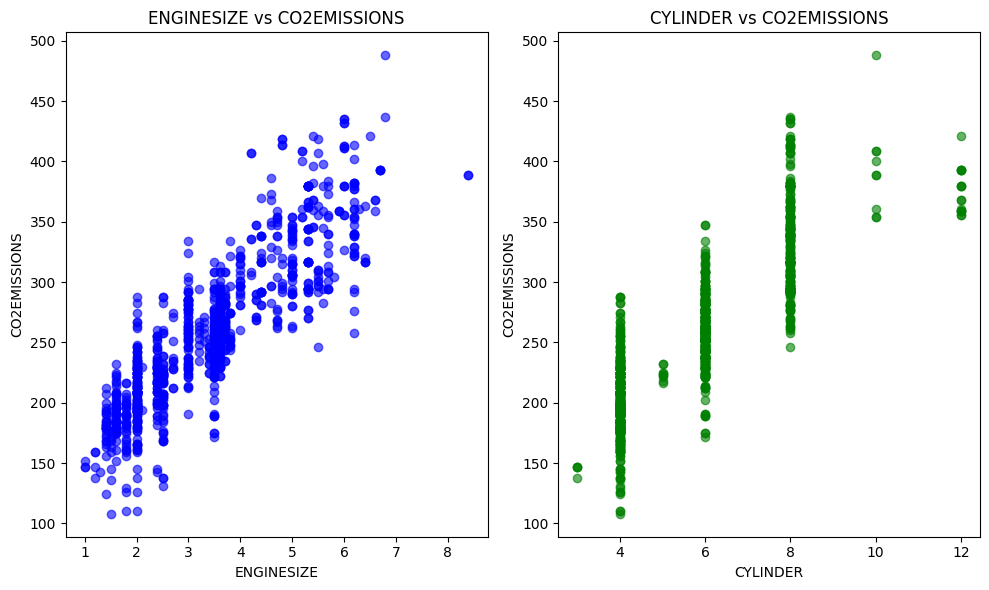

In [31]:
# Extract the features and target variables
ENGINESIZE = df["ENGINESIZE"]
CYLINDER = df["CYLINDERS"]
CO2EMISSIONS = df["CO2EMISSIONS"]

# Plotting the data
plt.figure(figsize=(10, 6))

# Plotting the relationship between ENGINESIZE and CO2EMISSIONS
plt.subplot(1, 2, 1)
plt.scatter(ENGINESIZE, CO2EMISSIONS, color='blue', alpha=0.6)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE vs CO2EMISSIONS')

# Plotting the relationship between CYLINDER and CO2EMISSIONS
plt.subplot(1, 2, 2)
plt.scatter(CYLINDER, CO2EMISSIONS, color='green', alpha=0.6)
plt.xlabel('CYLINDER')
plt.ylabel('CO2EMISSIONS')
plt.title('CYLINDER vs CO2EMISSIONS')

plt.tight_layout()
plt.show()

# ***Building the model***

In [32]:
# Import packages:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
# Extract features (X) and target (y)
X = df[['ENGINESIZE', 'CYLINDERS']]
y = df['CO2EMISSIONS']
print(X)
print(y)

      ENGINESIZE  CYLINDERS
0            2.0          4
1            2.4          4
2            1.5          4
3            3.5          6
4            3.5          6
...          ...        ...
1062         3.0          6
1063         3.2          6
1064         3.0          6
1065         3.2          6
1066         3.2          6

[1067 rows x 2 columns]
0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64


In [34]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Display the shapes of the training and testing datasets
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Training data shape (X_train, y_train): (853, 2) (853,)
Testing data shape (X_test, y_test): (214, 2) (214,)


In [36]:
# creating a regression model
regr = LinearRegression()

# fitting the model
regr.fit(X_train, y_train)

# Make predictions on the train set y_pred
y_pred = regr.predict(X_train)
y_pred

array([185.42338053, 305.77712357, 248.49464617, 248.49464617,
       331.82667063, 305.77712357, 268.75540499, 202.78974524,
       294.1995471 , 265.86101087, 299.98833533, 214.3673217 ,
       400.08131955, 323.14348827, 343.40424709, 268.75540499,
       357.87621768, 262.96661675, 265.86101087, 214.3673217 ,
       265.86101087, 202.78974524, 202.78974524, 217.26171582,
       185.42338053, 265.86101087, 265.86101087, 265.86101087,
       277.43858734, 202.78974524, 262.96661675, 340.50985298,
       217.26171582, 294.1995471 , 262.96661675, 191.21216877,
       202.78974524, 262.96661675, 331.82667063, 268.75540499,
       202.78974524, 402.97571367, 268.75540499, 340.50985298,
       265.86101087, 357.87621768, 248.49464617, 185.42338053,
       305.77712357, 286.12176969, 323.14348827, 268.75540499,
       202.78974524, 265.86101087, 214.3673217 , 331.82667063,
       343.40424709, 337.61545886, 191.21216877, 248.49464617,
       262.96661675, 277.43858734, 248.49464617, 191.21

In [37]:
# Coef and Intercept:
m= regr.coef_
c= regr.intercept_
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [28.94394117  8.38047988]
Intercept:  111.37994337122183


In [38]:
# Evaluation Metrics
mse_train = mean_squared_error(y_train, y_pred)
mae_train = mean_absolute_error(y_train, y_pred)
print("Training set evaluation metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)

Training set evaluation metrics:
Mean Squared Error: 907.6973344859297
Mean Absolute Error: 23.084739820370004


<function matplotlib.pyplot.show(close=None, block=None)>

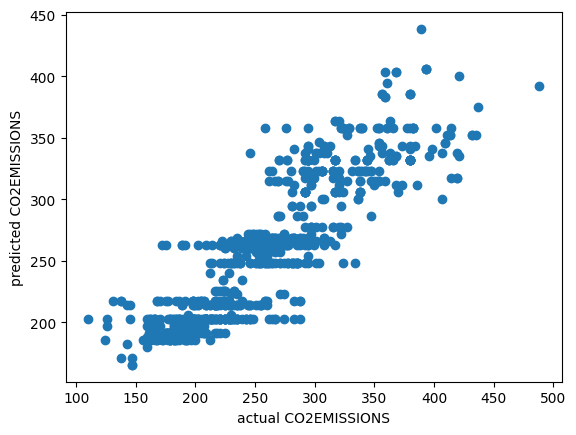

In [39]:
# Scatter plot to visualize the actual vs. predicted CO2EMISSIONS on the training set
plt.scatter(y_train,y_pred)
plt.xlabel("actual CO2EMISSIONS")
plt.ylabel("predicted CO2EMISSIONS")
plt.show